ランダムフォレストの実験
- どうやってノードの値を決めてるか
- どうやって予測してるか
- 非定常過程とランダムフォレスト

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

In [48]:
df = pd.DataFrame(fetch_california_housing()['data'], columns=fetch_california_housing()['feature_names'])
df['MedHouseVal'] = fetch_california_housing()['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
y = df["MedHouseVal"]
X = df.drop("MedHouseVal", axis=1).round(2) # tree.plot()の表示の関係で小数点以下2つまでにする
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25


In [50]:
model = RandomForestRegressor(max_depth=2, n_estimators=1, random_state=0, bootstrap=False)
model.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=2, n_estimators=1,
                      random_state=0)

In [51]:
model.estimators_

[DecisionTreeRegressor(max_depth=2, max_features=1.0, random_state=209652396)]

RandomForest内の木が1つで葉が4種類ある。

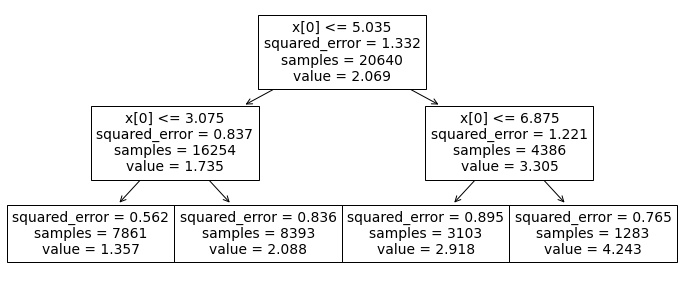

In [52]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 5))
tree.plot_tree(model.estimators_[0], ax=ax)
plt.show()

なのでmodelの予測値は4種類だけ

In [55]:
X_test = df.drop("MedHouseVal", axis=1)
y_pred = model.predict(X_test)
print(len(y_pred))
print(np.unique(y_pred))

20640
[1.35733919 2.08839565 2.91753394 4.24316808]


ノードのvalueはそのノードに落ちた目的変数yの平均をとっている

In [57]:
#  一番左のノードに入ってるであろうデータ
print(len(X.query("MedInc<=3.075"))) # MedIncがX[0]
print(df.query("MedInc<=3.075")["MedHouseVal"].mean())

7861
1.357542326764145


In [59]:
# 左から2番目
print(len(X.query("3.075<=MedInc<=5.035")))
print(df.query("3.075<=MedInc<=5.035")["MedHouseVal"].mean())

8393
2.088436231832261


In [58]:
# 左から3番目
print(len(X.query("5.035<=MedInc<=6.875")))
print(df.query("5.035<=MedInc<=6.875")["MedHouseVal"].mean())

3103
2.9175339445697714


In [63]:
# 左から4番目
print(len(X.query("6.875<=MedInc")))
print(df.query("6.875<=MedInc")["MedHouseVal"].mean())

1283
4.243168082618863


木を増やす

In [67]:
model = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=0, bootstrap=True)
model.fit(X, y)

RandomForestRegressor(max_depth=2, n_estimators=10, random_state=0)

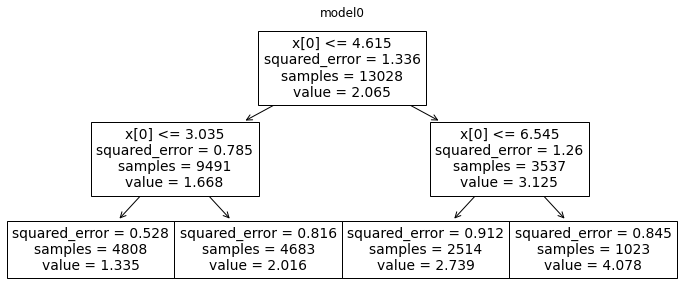

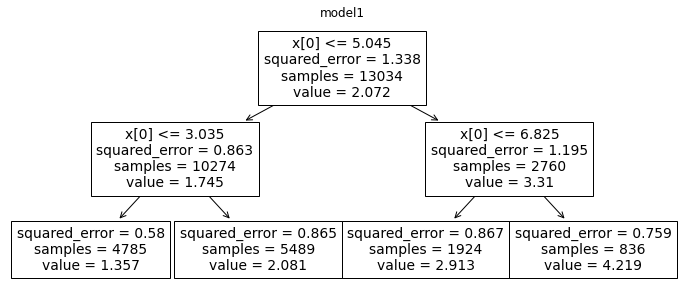

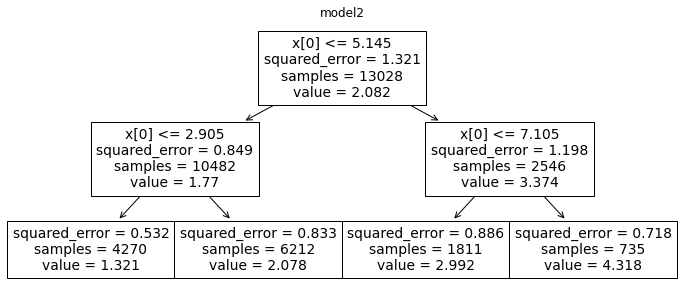

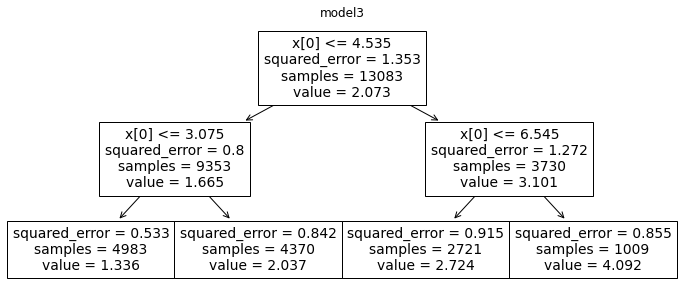

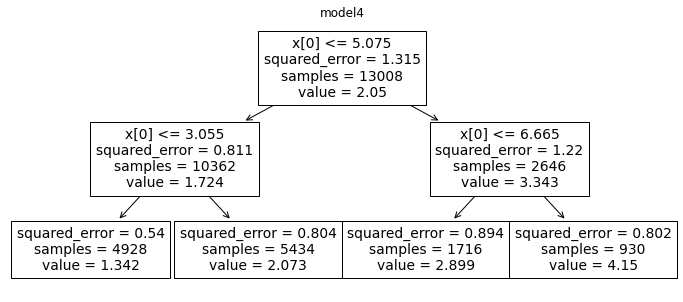

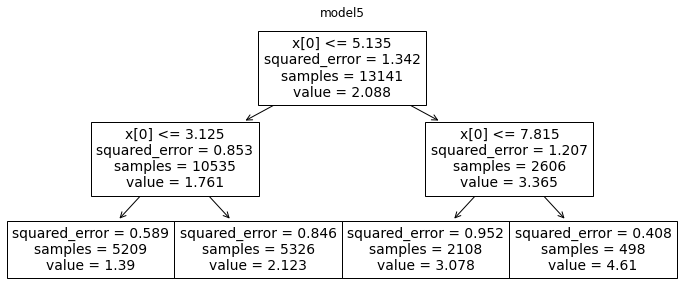

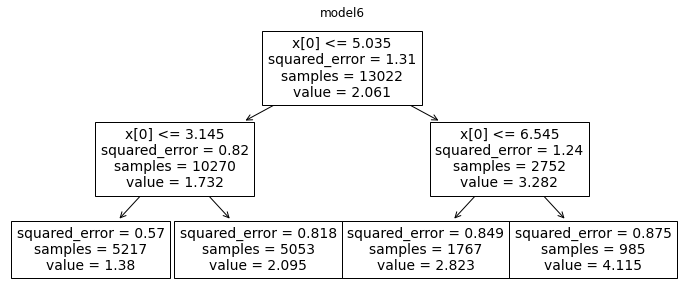

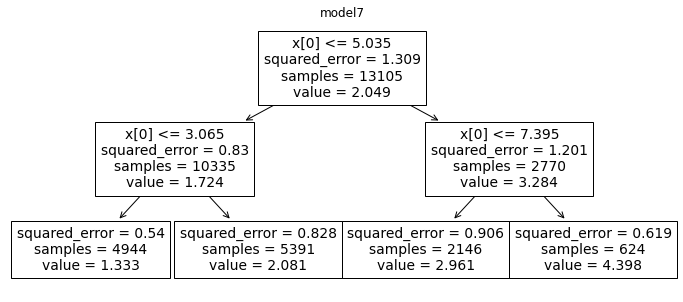

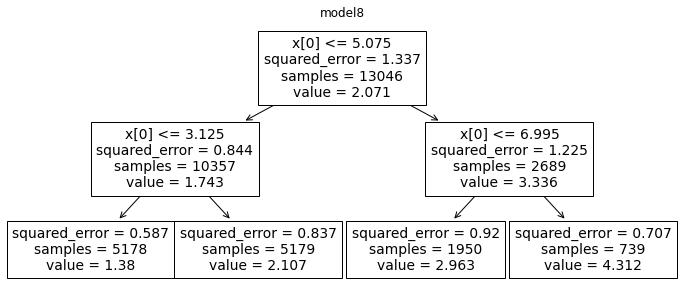

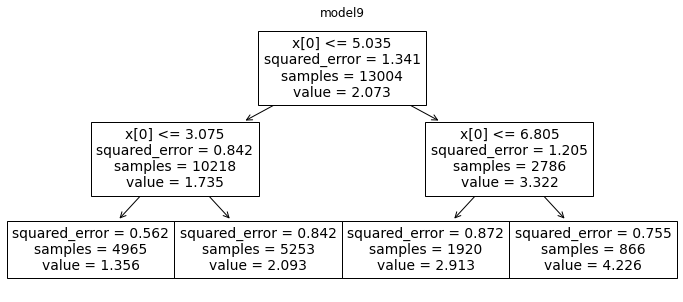

In [68]:
for i, estimator in enumerate(model.estimators_):
  fig, ax = plt.subplots(figsize=(12, 5))
  tree.plot_tree(estimator, ax=ax)
  ax.set_title(f"model{i}")
  plt.show()

ランダムフォレストの予測は作った木達の平均を出力としてる

In [84]:
X_test = df.drop("MedHouseVal", axis=1).iloc[:1]
print(X_test)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   

   Longitude  
0    -122.23  


In [97]:
# 予測値
print(model.predict(X_test))
# 木を1本づつ取り出して予測させ平均をとってみる
print(np.mean([estimator.predict(X_test.to_numpy()) for estimator in model.estimators_]))

[4.25166753]
4.2516675263418335


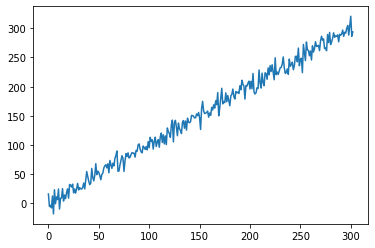

In [117]:
np.random.seed(1)
data = np.arange(0, 303) + np.random.randn(303)*10
plt.plot(data);

In [118]:
df = pd.DataFrame({"y":data})
for i in range(1, 4):
  df[f"lag_{i}"] = df['y'].shift(i)
df = df.dropna()

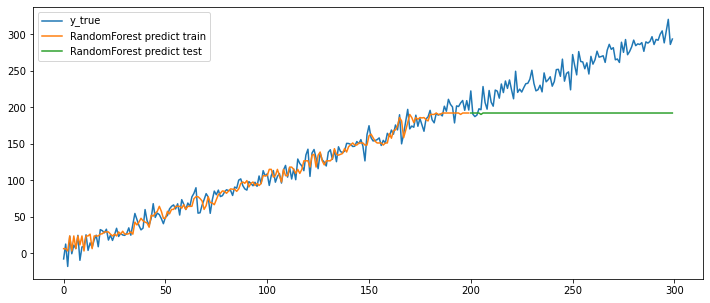

In [123]:
X_train = df.drop("y", axis=1).iloc[:200]
y_train = df.iloc[:200]["y"]
X_test = df.drop("y", axis=1).iloc[200:]
y_test = df.iloc[200:]["y"]

model = RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0,)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(0, 300)
ax.plot(x, df["y"], label='y_true')
ax.plot(x[:200], y_pred1, label="RandomForest predict train")
ax.plot(x[200:], y_pred2, label="RandomForest predict test")
plt.legend()
plt.show()